In [1]:
import pandas as pd

Загружаем файл

In [2]:
train = pd.read_csv('train.csv', sep=',', index_col=0,
                       dtype = {'row_id': 'int64', 'timestamp': 'int64', 'user_id': 'int32', 'content_id': 'int16', 
                                'content_type_id': 'int8', 'task_container_id': 'int16', 'user_answer': 'int8', 
                                'answered_correctly': 'int8', 'prior_question_elapsed_time': 'float32', 
                                'prior_question_had_explanation': 'boolean'
                               }
                      )

In [3]:
train.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
row_id,,,,,,,,,
0,0,115,5692,0,1,3,1,NaN,<NA>
1,56943,115,5716,0,2,2,1,37000.0,False
2,118363,115,128,0,0,0,1,55000.0,False
3,131167,115,7860,0,3,0,1,19000.0,False
4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  boolean
dtypes: boolean(1), float32(1), int16(2), int32(1), int64(1), int8(3)
memory usage: 3.1 GB


In [6]:
# Последний столбей сделаем числовым

for i in range(train.shape[0]):
    if pd.isna(train['prior_question_had_explanation'][i]) == True:
        train['prior_question_had_explanation'][i] = False
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].astype('int8')

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101230332 entries, 0 to 101230331
Data columns (total 9 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int32  
 2   content_id                      int16  
 3   content_type_id                 int8   
 4   task_container_id               int16  
 5   user_answer                     int8   
 6   answered_correctly              int8   
 7   prior_question_elapsed_time     float32
 8   prior_question_had_explanation  int8   
dtypes: float32(1), int16(2), int32(1), int64(1), int8(4)
memory usage: 3.0 GB


Работаем с таблицей Train

In [9]:
#проверим количество уникальных элементов

unique_list = []
for col in train.columns:
    item = (col, train[col].nunique(), train[col].dtype)
    unique_list.append(item)
unique_counts = pd.DataFrame(unique_list,
                             columns=['Column_Name', 'Num_Unique', 'Type']
                            ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts)

,Column_Name,Num_Unique,Type
0,content_type_id,2,int8
1,prior_question_had_explanation,2,int8
2,answered_correctly,3,int8
3,user_answer,5,int8
4,prior_question_elapsed_time,3258,float32
5,task_container_id,10000,int16
6,content_id,13782,int16
7,user_id,393656,int32
8,timestamp,72821015,int64


In [79]:
# Сравним активности

train['content_type_id'].value_counts(normalize=True) 
train['content_type_id'].value_counts()[0] 
train['content_type_id'].value_counts()[1] 

# Основная активность приходится на ответы на вопросы

1.0106370331624595

In [10]:
 # оценим правильные и неправильные ответы

train[train['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True) 
train[train['answered_correctly'] != -1]['answered_correctly'].value_counts()[1] 
train[train['answered_correctly'] != -1]['answered_correctly'].value_counts()[0]
train[train['answered_correctly'] != -1]['answered_correctly'].mean()

# Правильных 66%

In [536]:
# Время решения одного вопроса

train['prior_question_elapsed_time'].mean()

13005.0810546875

In [541]:
# оценим средние показатели


train[train['content_type_id'] == 0].shape[0] / train['user_id'].nunique()
train[train['answered_correctly'] != -1]['answered_correctly'].sum() / train['user_id'].nunique()
train[train['content_type_id'] == 1].shape[0] / train['user_id'].nunique()
train['prior_question_had_explanation'].sum() / train['user_id'].nunique()
train['prior_question_elapsed_time'].mean()



---

Создадим новый DataFrame

Добавим данные:
user_id: ID студента
time: время на платформе
ques_quant: количество отвеченных вопросов
av_grade: средний балл студента
lec_watched: просмотренные лекции лекций
expl_watched: виденные объяснения на предыдущие вопросы

In [478]:
# Создаем DF по id студентов

sudents_list = list(train['user_id'].unique())
users_q = len(sudents_list)


In [ ]:
# Тк компьютер не тянет, берём только 500 из них
sudents_list = sudents_list[:500]

In [479]:
# Время на платформе

time = []
for student in sudents_list:
    t = train[train['user_id'] == student]['timestamp'].max()
    time.append(t)

In [480]:
# Отвеченные вопросы

ques_quant = []
for student in sudents_list:
    q = train[(train['user_id'] == student) & (train['content_type_id'] == 0)]['content_type_id'].count()
    ques_quant.append(q)

In [481]:
# Средний балл

av_grade = []
for student in sudents_list:
    g = train[(train['user_id'] == student) & (train['answered_correctly'] != -1)]['answered_correctly'].mean()
    av_grade.append(g)

In [482]:
# Количество лекицй

lec_watched = []
for student in sudents_list:
    l = train[train['user_id'] == student]['content_type_id'].sum()
    lec_watched.append(l)

In [483]:
#Просмотренные объяснения

expl_watched = []
for student in sudents_list:
    e = train[train['user_id'] == student]['prior_question_had_explanation'].sum()
    expl_watched.append(e)

In [535]:
# Среднее время на один вопрос

ques_time = []
for student in sudents_list:
    qt = train[(train['user_id'] == student)]['prior_question_elapsed_time'].mean()
    ques_time.append(qt)

In [545]:
# Вносим полученные данные

students = pd.DataFrame({'user_id': sudents_list,
                        'time': time,
                        'ques_quant': ques_quant,
                        'av_grade': av_grade,
                        'lec_watched': lec_watched,
                        'expl_watched': expl_watched,
                         'ques_time': ques_time
                       }
                      )
students = students.astype({'user_id': 'int32',
                            'time': 'int64',
                            'ques_quant': 'int16', 
                            'av_grade': 'float32',
                            'lec_watched': 'int16',
                            'expl_watched': 'int16',
                            'ques_time': 'float32'
                           })

In [546]:
students.head()

,user_id,time,ques_quant,av_grade,lec_watched,expl_watched,ques_time
0,115,668090043,46,0.695652,0,6,19933.310547
1,124,571323,30,0.233333,0,0,18793.000000
2,2746,835457,19,0.578947,1,11,18055.554688
3,5382,2101551456,125,0.672000,3,113,36048.386719
4,8623,862338736,109,0.642202,3,96,26107.408203


<AxesSubplot:>

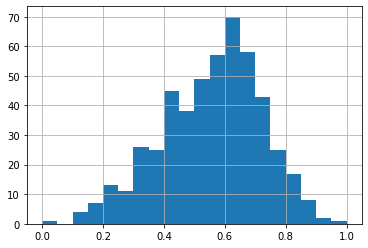

In [544]:
# распределение вредних оценок среди студентов

students['av_grade'].hist(bins=20)

In [523]:
students['av_grade'].median()

0.5808496475219727

оценим успешность студента от:
- времени, проведенного на платформе
- количества заданий
- количества объяснений
- времени, затраченного на каждый вопрос
- просмотренных лекций

<AxesSubplot:xlabel='av_grade', ylabel='time'>

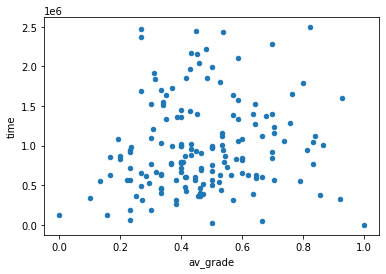

In [506]:

students[students['time'] < 3000000].plot.scatter(x='av_grade', y='time')


array([[<AxesSubplot:title={'center':'time'}>]], dtype=object)

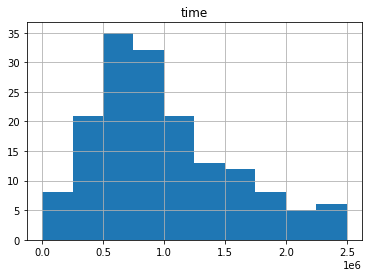

In [527]:
# В какой момент студенты прекращают занятия

students[students['time'] < 3000000].hist(column=['time'])


In [528]:

students[students['time'] < 2500000].shape

(161, 8)

<AxesSubplot:xlabel='av_grade', ylabel='time'>

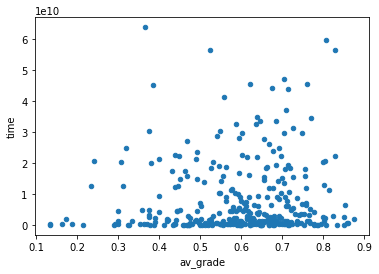

In [529]:
# Построим диаграмму рассеяния для студентов, не бросивших учебу в течение 1го часа.

students[students['time'] > 3000000].plot.scatter(x='av_grade', y='time')


<AxesSubplot:xlabel='av_grade', ylabel='ques_quant'>

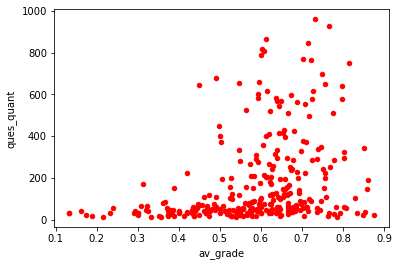

In [556]:
# Построим диаграмму зависимости правильных ответов от количества сделанных заданий. 

students[(students['ques_quant'] < 1000) & (students['time'] > 3000000)].plot.scatter(x='av_grade', y='ques_quant', c='red')



In [593]:
# Добавим новый столбец с группировкой по количеству отвеченных вопросов

def ques_convert(e):
    if e < students['ques_quant'].quantile(0.1): return 0
    elif e < students['ques_quant'].quantile(0.2): return 1
    elif e < students['ques_quant'].quantile(0.3): return 2
    elif e < students['ques_quant'].quantile(0.4): return 3
    elif e < students['ques_quant'].quantile(0.5): return 4
    elif e < students['ques_quant'].quantile(0.6): return 5
    elif e < students['ques_quant'].quantile(0.7): return 6
    elif e < students['ques_quant'].quantile(0.8): return 7
    elif e < students['ques_quant'].quantile(0.9): return 8
    else: return 9
    
students['q_group'] = students['ques_quant'].apply(ques_convert)

<AxesSubplot:title={'center':'av_grade'}, xlabel='[q_group]'>

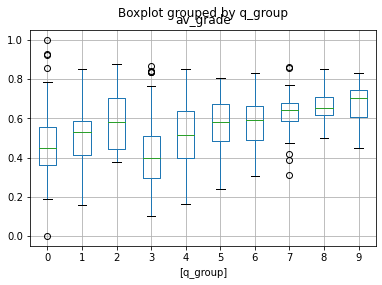

In [594]:
students.boxplot(column=['av_grade'], by=['q_group'])


In [600]:
students['ques_quant'].quantile(0.4)

31.600000000000023

array([[<AxesSubplot:title={'center':'ques_quant'}>]], dtype=object)

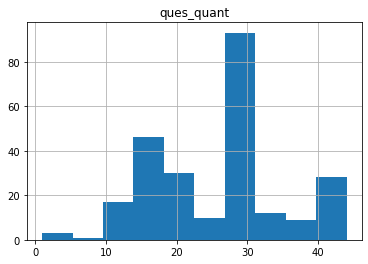

In [601]:

students[(students['ques_quant'] < students['ques_quant'].quantile(0.5))].hist(column=['ques_quant'])

<AxesSubplot:xlabel='av_grade', ylabel='expl_watched'>

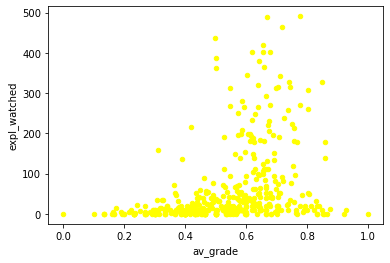

In [560]:
# Построим диаграмму, показывающую зависимость правильных ответов от количества объяснений

students[(students['expl_watched'] < 500)].plot.scatter(x='av_grade', y='expl_watched', c='yellow')

<AxesSubplot:title={'center':'av_grade'}, xlabel='[e_group]'>

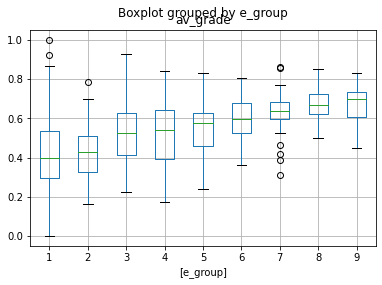

In [592]:
students.boxplot(column=['av_grade'], by=['e_group'])

# С ростом количества просмотренных объяснений виден тренд на повышение оценки






Исследуем файл "Вопросы"
questions.csv

question_id: внешний ключ вопроса - соответствует content_id
bundle_id: код, по которому вопросы отдаются совместно
correct_answer: правильный ответ. Можно использовать для проверки правильности user_answer
part: номер раздела в тесте TOEIC
tags: кодировка типа вопроса







In [616]:
questions = pd.read_csv('questions.csv', sep=',',
                        dtype = {'question_id': 'int16', 'bundle_id': 'int16', 'correct_answer': 'int8',
                                 'part': 'int8', 'tags': 'object'
                               })
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int16 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(2), int8(2), object(1)
memory usage: 185.0+ KB


In [2]:
# Количество уникальных значений по колонкам

unique_list_q = []
for col in questions.columns:
    item = (col, questions[col].nunique(), questions[col].dtype)
    unique_list_q.append(item)
unique_counts_q = pd.DataFrame(unique_list_q,
                               columns=['Column_Name', 'Num_Unique', 'Type']
                              ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts_q)

NameError: name 'questions' is not defined

In [618]:
questions['question_id'].groupby(questions['bundle_id']).count().max()
questions['part'].value_counts(normalize=True)
questions['tags'].describe()

# Часть вопросов объединены по bundle_id в блоки до 5 вопросов, хотя большинство представлены по одиночке
# Задачи разделены по темам на 7 разделов, больше всего посвящено 5му разделу, 2, 3 и 4

count     13522
unique     1519
top           8
freq        738
Name: tags, dtype: object

In [639]:
q_tags = set()
for tag in questions['tags']:
    try:
        for t in tag.split():
                q_tags.add(int(t))
    except:
        q_tags.add(int(t))
len(q_tags)

# Можно провести доп исследование вопросов, используя кластеризацию по 188 доп.признакам 'tags'

188

In [145]:
# Создадим единую таблицу по их id с данными train

tmp_df = train.loc[(train.content_type_id == 0), ['content_id', 'answered_correctly']]

In [619]:
q_list = list(tmp_df['content_id'].unique())
len(q_list)

# Всего 13523 уникальных вопросов. Мы берем этот список из файла Train, чтобы иметь правильный порядок данных

13523

In [620]:
# q_quant - общее количество ответов для каждого id
#correct_quant - количество правильных ответов для каждого id

q_quant = []
correct_quant = []
for q in q_list:
    tmp = tmp_df[tmp_df['content_id'] == q]['answered_correctly'].count()
    tmp1 = tmp_df[tmp_df['content_id'] == q]['answered_correctly'].sum()
    q_quant.append(tmp)
    correct_quant.append(tmp1)

In [627]:
# Запишем в единую таблицу

q_ex = pd.DataFrame({'question_id': q_list,
                        'q_quant': q_quant,
                        'correct_quant': correct_quant
                       }
                      )
q_ex = q_ex.astype({'question_id': 'int16', 'q_quant': 'int32', 'correct_quant': 'int32'})

In [ ]:
# Внесем полученные данные в таблицк questions, удалив ненужные столбцы

questions = questions.drop('correct_answer', axis=1)
questions = pd.merge(questions, q_ex, how='inner')

In [623]:
# Добавим процент правильных ответов

questions['correct_percent'] = questions['correct_quant'] / questions['q_quant']
questions.describe()

,question_id,bundle_id,part,q_quant,correct_quant,correct_percent
count,13523.00000,13523.000000,13523.000000,13523.000000,13523.000000,13523.000000
mean,6761.00000,6760.510907,4.264956,7340.922872,4824.715448,0.709460
std,3903.89818,3903.857783,1.652553,11455.927774,6419.482619,0.164486
min,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,3380.50000,3379.500000,3.000000,1765.500000,1274.000000,0.609345
50%,6761.00000,6761.000000,5.000000,4732.000000,3236.000000,0.734215
75%,10141.50000,10140.000000,5.000000,8556.000000,5877.500000,0.835116
max,13522.00000,13522.000000,7.000000,213605.000000,149422.000000,1.000000


In [630]:
questions

,question_id,bundle_id,part,tags,q_quant,correct_quant,correct_percent
0,0,0,1,51 131 162 38,6903,6266,0.907721
1,1,1,1,131 36 81,7398,6589,0.890646
2,2,2,1,131 101 162 92,44905,24890,0.554281
3,3,3,1,131 149 162 29,22973,17906,0.779437
4,4,4,1,131 5 162 38,31736,19461,0.613215
...,...,...,...,...,...,...,...
13518,13518,13518,5,14,868,683,0.786866
13519,13519,13519,5,8,924,528,0.571429
13520,13520,13520,5,73,861,579,0.672474
13521,13521,13521,5,125,870,703,0.808046


In [156]:

questions.groupby('part').mean()['correct_percent'].sort_values()

# Сложность курса возрастает. 5й раздел содержит максимальное число леций и заданий, однако средняя успеваемость студентов 
# для него самая низкая.

part
5    0.666119
6    0.699596
7    0.717958
4    0.724918
3    0.744598
2    0.745296
1    0.815104
Name: correct_percent, dtype: float64




Исследуем данные "Лекции"
lectures.csv
lecture_id внешний ключ лекции - соответствует content_id
part: код темы/раздела *7 тем*
tag: кодировка типа лекции, можно использовать для кластеризации лекций *151 тип*
type_of: краткое описание цели леции: *'concept', 'solving question', 'intention', 'starter'*




In [113]:
lectures = pd.read_csv('lectures.csv', sep=',',
                      dtype = {'lecture_id': 'int16', 'tag': 'int16', 
                               'part': 'int8', 'type_of': 'object'})
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int16 
 1   tag         418 non-null    int16 
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int16(2), int8(1), object(1)
memory usage: 5.4+ KB


In [115]:
# Уникальные значения по столбцам

unique_list_lec = []
for col in lectures.columns:
    item = (col, lectures[col].nunique(), lectures[col].dtype)
    unique_list_lec.append(item)
unique_counts_lec = pd.DataFrame(unique_list_lec,
                                 columns=['Column_Name', 'Num_Unique', 'Type']
                                ).sort_values(by='Num_Unique',  ignore_index=True)
display(unique_counts_lec)



,Column_Name,Num_Unique,Type
0,type_of,4,object
1,part,7,int8
2,tag,151,int16
3,lecture_id,418,int16


In [644]:
lectures['part'].value_counts(normalize=True)
lectures['type_of'].value_counts(normalize=True)
lectures['tag'].value_counts().head()

136    7
161    6
62     6
113    6
116    6
Name: tag, dtype: int64

In [157]:
# создадим таблицу по их id с данными train

l_list = list(train[train['content_type_id'] == 1]['content_id'].unique())
len(l_list)

# Всего 415 уникальных лекций.

415

In [158]:
# Количество просмотров лекций для каждого id

l_quant = []
for l in l_list:
    tmp_l = train[(train['content_id'] == l)]['content_id'].count()
    l_quant.append(tmp_l)

In [160]:
# Занесем в таблицу

l_ex = pd.DataFrame({'lecture_id': l_list,
                        'l_quant': l_quant
                       }
                      )
l_ex = l_ex.astype({'lecture_id': 'int16', 'l_quant': 'int32'})

In [161]:
# и в таблицу lectures

lectures = pd.merge(lectures, l_ex, how='inner')
display(lectures)

,lecture_id,tag,part,type_of,l_quant
0,89,159,5,concept,24468
1,100,70,1,concept,18284
2,185,45,6,concept,47470
3,192,79,5,solving question,11073
4,317,156,5,solving question,11161
...,...,...,...,...,...
410,32535,8,5,solving question,3666
411,32570,113,3,solving question,2910
412,32604,24,6,concept,4
413,32625,142,2,concept,8031


In [660]:
# Общий рейтинг популярности для лекций

lectures.sort_values(by=['l_quant'], ascending=False).head()

,lecture_id,tag,part,type_of,l_quant,l_quant_normal
124,10688,39,7,concept,133046,1.000000
5,335,114,2,concept,60616,0.455602
44,3852,161,4,solving question,57766,0.434181
2,185,45,6,concept,47470,0.356794
62,5694,140,2,concept,46255,0.347662


In [212]:
# Рейтинг популярности для лекций, в зависимости от раздела

lectures.groupby('part').sum()['l_quant'].sort_values(ascending=False)

part
5    1231941
2     565635
6     493644
1     354329
7     256938
4     191726
3     153522
Name: l_quant, dtype: int32

In [218]:
# Рейтинг относительной популярности лекций по разделам

for part in range(1, 8):
    print(part, lectures.groupby('part').sum()['l_quant'].sort_values(ascending=False)[part]/lectures['part'].value_counts()[part])
    
# Наибольшее число просмотров имеет лекция из 7го раздела, 
# при этом самая высокая средневзвешенная популярность у лекций 2 раздела

1 6561.648148148148
2 10100.625
3 8080.105263157895
4 6184.709677419355
5 8675.640845070422
6 6094.37037037037
7 8029.3125


In [661]:
# Рейтинг популярности для лекций, в зависимости от тега лекции

lectures.groupby('tag').sum()['l_quant'].sort_values(ascending=False).head()

tag
39     133046
161     91792
62      80640
27      79111
114     69673
Name: l_quant, dtype: int32